In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer=load_breast_cancer()

In [4]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
breast_cancer.data.shape

(569, 30)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
knn_breast_cancer=KNeighborsClassifier(n_neighbors=8)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(breast_cancer.data,breast_cancer.target,test_size=.2)

In [33]:
knn_breast_cancer.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [34]:
y_predict=knn_breast_cancer.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
confusion_matrix(y_test,y_predict,labels=[0,1])

array([[36,  6],
       [ 4, 68]])

In [60]:
print(classification_report(y_test,y_predict,))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.92      0.94      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logistic_regression=LogisticRegression()

In [64]:
logistic_regression.fit(x_train,y_train)

/home/mohammad-hossein-abedi/Documents/Code/Machine_learning_Puyan_Rajiyan/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_predict_lr= logistic_regression.predict(x_test)

In [78]:
cm=confusion_matrix(y_test,y_predict_lr,labels=[0,1])
print(cm)

[[39  3]
 [ 1 71]]


In [79]:
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [80]:
from sklearn.preprocessing import normalize


In [87]:
cm=normalize(cm,norm='l2',axis=1)

In [88]:
cm_df=pd.DataFrame(cm,columns=breast_cancer.target_names,index=breast_cancer.target_names)

In [89]:
cm_df

,malignant,benign
malignant,0.997054,0.076696
benign,0.014083,0.999901


In [90]:
from sklearn.metrics import roc_curve

In [111]:
y_pred_prob=logistic_regression.predict_proba(x_test)[:,1]
#y_pred_prob
fpr,tpr,threshold= roc_curve(y_test,y_pred_prob)

Text(0, 0.5, 'tpr')

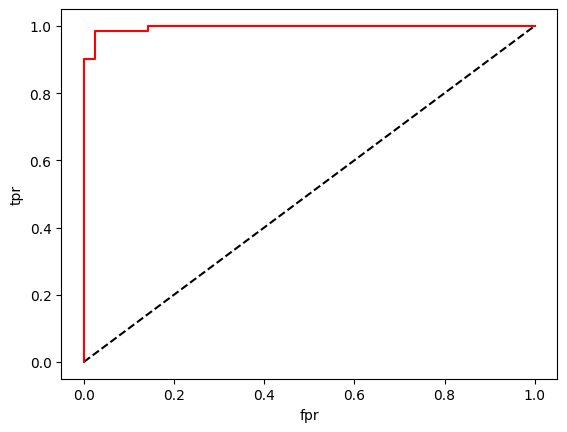

In [119]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,'r-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [120]:
from sklearn.metrics import roc_auc_score

In [121]:
roc_auc_score(y_test,y_pred_prob)

0.996031746031746